## Parámetros de búsqueda y conexión a Sophia

In [1]:
import elasticsearch
from datetime import datetime

#Seleccionar noticias
country="chile"
from_="2021-03-11"
to_="2021-03-18"
media_outlets=["elllanquihue","elaustral","laestrelladechiloe","elheraldoaustral","radiosago",
               "elrepuertero","elvacanudo","elhuemul","seminariolocal","elquellonino","elinsular",
               "radiopudeto","radioacogida","elcalbucano","segundos33",
               "prensadelestuario","fresiaahora","soychiloe"]

keyword="" #Sin tema en específico
simple_keyword=False

#Conexión a Sophia
IP = "http://search.sophia2.org:9200"
PORT = 9200
USER= "elastic"
PASS= "dummy_elastic"
#NO MODIFICAR

es = elasticsearch.Elasticsearch(
    IP,
    #port=PORT,
    http_auth=(USER, PASS)
)

In [2]:
elasticsearch.__version__

(7, 16, 3)

## Búsqueda de noticias de prensa

- Preparación de la consulta en el formato solicitado por Elasticsearch

In [3]:
#NO MODIFICAR
match=""
if (simple_keyword):
    match="match"
else:
    match="match_phrase"

query = { 
    "bool": { 
      #"must": [
      #  {match: { "text":keyword}}
        
     #],
    "filter": [
        {"range": {
      "date": {
        "gte": from_,
        "lt": to_
      }}},
        { "term":  { "country": country }},
        { "terms":  { "media_outlet": media_outlets }} 
    ]
    }  
}

In [4]:
res = es.search(index="news", query=query, size=10000)
print("Son %d noticias encontradas..." % res['hits']['total']['value'])

Son 1595 noticias encontradas...


In [5]:
import pandas as pd

data = {'id_news':[],'country':[],'media_outlet':[],'url':[],'title':[],'text':[],'date':[],'search':[]}

df = pd.DataFrame(data)  
  
for hit in res['hits']['hits']:
    id_news = hit['_source']['id_news']
    country = hit['_source']['country']
    media_outlet = hit['_source']['media_outlet']
    url = hit['_source']['url']
    title = hit['_source']['title']
    text = hit['_source']['text']
    date = hit['_source']['date']
    search = keyword
    
    new_row = {'id_news':id_news, 'country':country, 'media_outlet':media_outlet, 'url':url, 'title':title, 'text':text, 'date':date, 'search':search}
    
    df = df.append(new_row, ignore_index=True)

df

C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\A

C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\A

C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\A

C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\A

C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\A

C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\A

C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\A

C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\A

C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\A

C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\A

C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\A

C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\A

C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\A

C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\A

C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\A

C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/2054475504.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\javie\A

,id_news,country,media_outlet,url,title,text,date,search
0,21920568.0,chile,radiosago,https://www.radiosago.cl/covid-19-reportan-315...,Covid-19: Reportan 315 casos y dos fallecidos ...,La región de Los Lagos reportó este domingo 31...,2021-03-14,
1,21920602.0,chile,radiosago,https://www.radiosago.cl/bibliotecas-de-puerto...,"Bibliotecas de Puerto Varas, Río Puelo, Fresia...",22 bibliotecas públicas de 10 regiones del pa...,2021-03-14,
2,21920612.0,chile,radiosago,https://www.radiosago.cl/deslindan-responsabil...,Deslindan responsabilidad a la Dirección de Ob...,En conversación con Radio Sago el alcalde de ...,2021-03-15,
3,21920625.0,chile,radiosago,https://www.radiosago.cl/region-de-los-lagos-r...,Región de Los Lagos registra mortalidad masiva...,El Servicio Nacional de Pesca y Acuicultura d...,2021-03-15,
4,21920653.0,chile,radiosago,https://www.radiosago.cl/seremi-de-bienes-naci...,Seremi de Bienes Nacionales desmintió dichos d...,"Luego que el alcalde de Palena, Ricardo Soto,...",2021-03-17,
...,...,...,...,...,...,...,...,...
1590,47508619.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,Monticello deberá indemnizar a familia de trab...,"En un fallo unánime, la Segunda Sala de la Cor...",2021-03-17,
1591,47508621.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,Nuevo presidente de Comisión de Constitución p...,La Comisión de Constitución de la Cámara de Di...,2021-03-17,
1592,47508622.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,"Campos: ""Tenemos que salir como si no hubiese ...",La Universidad de Chile femenina dio un paso h...,2021-03-17,
1593,47508626.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,la cocina de don tinto,Es probablemente una de las hortalizas más pop...,2021-03-17,


In [6]:
df['url'].duplicated().any()

True

In [7]:
df = df.drop_duplicates(subset='url', keep='first')

 - Duplicados eliminados

In [8]:
df

,id_news,country,media_outlet,url,title,text,date,search
0,21920568.0,chile,radiosago,https://www.radiosago.cl/covid-19-reportan-315...,Covid-19: Reportan 315 casos y dos fallecidos ...,La región de Los Lagos reportó este domingo 31...,2021-03-14,
1,21920602.0,chile,radiosago,https://www.radiosago.cl/bibliotecas-de-puerto...,"Bibliotecas de Puerto Varas, Río Puelo, Fresia...",22 bibliotecas públicas de 10 regiones del pa...,2021-03-14,
2,21920612.0,chile,radiosago,https://www.radiosago.cl/deslindan-responsabil...,Deslindan responsabilidad a la Dirección de Ob...,En conversación con Radio Sago el alcalde de ...,2021-03-15,
3,21920625.0,chile,radiosago,https://www.radiosago.cl/region-de-los-lagos-r...,Región de Los Lagos registra mortalidad masiva...,El Servicio Nacional de Pesca y Acuicultura d...,2021-03-15,
4,21920653.0,chile,radiosago,https://www.radiosago.cl/seremi-de-bienes-naci...,Seremi de Bienes Nacionales desmintió dichos d...,"Luego que el alcalde de Palena, Ricardo Soto,...",2021-03-17,
...,...,...,...,...,...,...,...,...
950,22520125.0,chile,elheraldoaustral,https://www.eha.cl/noticia/actualidad/estudio-...,Estudio Fundación SOL: Más de la mitad de las ...,"Fundación SOL, presenta una nueva investigació...",2021-03-13,
951,22520128.0,chile,elheraldoaustral,https://www.eha.cl/noticia/actualidad/el-opera...,El operador chileno se propone obtener el sell...,G4 evalúa de manera independiente la política ...,2021-03-11,
952,22520522.0,chile,soychiloe,https://www.soychile.cl/Chiloe/Deportes/2021/0...,ABA Ancud marcha quinta en la Conferencia Sur ...,"En la tarde del sábado último, la 'Celeste' fu...",2021-03-16,
1543,47508207.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,MUNICIPIO DE,"Muchos años debieron pasar, en los cuales se r...",2021-03-12,


In [9]:
nombre_archivo="noticias_2021-03-11_2021-03-18csv"
print("El archivo se llama:")
print(nombre_archivo)
df.to_csv("./"+nombre_archivo)

El archivo se llama:
noticias_2021-03-11_2021-03-18csv


## Cargar nuestro dataset en dataframe Pandas

In [10]:
import pandas

# leer el archivo CSV
archivo = "noticias_2021-03-11_2021-03-18csv"
corpus = pandas.read_csv(archivo)

In [11]:
corpus.head(5)

,Unnamed: 0,id_news,country,media_outlet,url,title,text,date,search
0,0,21920568.0,chile,radiosago,https://www.radiosago.cl/covid-19-reportan-315...,Covid-19: Reportan 315 casos y dos fallecidos ...,La región de Los Lagos reportó este domingo 31...,2021-03-14,NaN
1,1,21920602.0,chile,radiosago,https://www.radiosago.cl/bibliotecas-de-puerto...,"Bibliotecas de Puerto Varas, Río Puelo, Fresia...",22 bibliotecas públicas de 10 regiones del pa...,2021-03-14,NaN
2,2,21920612.0,chile,radiosago,https://www.radiosago.cl/deslindan-responsabil...,Deslindan responsabilidad a la Dirección de Ob...,En conversación con Radio Sago el alcalde de ...,2021-03-15,NaN
3,3,21920625.0,chile,radiosago,https://www.radiosago.cl/region-de-los-lagos-r...,Región de Los Lagos registra mortalidad masiva...,El Servicio Nacional de Pesca y Acuicultura d...,2021-03-15,NaN
4,4,21920653.0,chile,radiosago,https://www.radiosago.cl/seremi-de-bienes-naci...,Seremi de Bienes Nacionales desmintió dichos d...,"Luego que el alcalde de Palena, Ricardo Soto,...",2021-03-17,NaN


In [12]:
len(corpus)

579

- Creamos una lista de noticias a partir del corpus

In [13]:
noticias = corpus.text.values.tolist()

In [14]:
noticias[500]

'En los próximos días el presidente Sebastián Piñera anunciará nuevas ayudas económicas para las familias de clase media afectadas por la pandemia. Así lo ha anticipado el ministro de Hacienda, Rodrigo Cerda, y lo ratificó ayer en un encuentro organizado por Diario Financiero. "Es importante que el gobierno y el Estado estén al lado de las familias apoyando los ingresos de los hogares más afectados. Van a seguir viendo más medidas de apoyo en los próximos días porque la pandemia no se ha acabado", dijo Cerda. Quien confirmó que se trata de un bono fue el ministro secretario general de la presidencia, Juan José Ossa. Consultado en radio Infinita, aseguró que "sí, se está preparando ese nuevo bono a la clase media, pero por supuesto que los detalles los va a dar el Presidente". En los últimos días ha trascendido que el aporte sería similar al bono entregado el año pasado, de $500 mil, pero incorporando mecanismos para garantizar que lo reciban familias que efectivamente hayan reducido su

In [15]:
#!pip install spacy==3.2.4
#!python -m spacy download es_core_news_sm

In [16]:
import spacy
from spacy.matcher import Matcher
nlp = spacy.load("es_core_news_sm")
matcher = Matcher(nlp.vocab)

In [17]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

### Preprocesamiento de las noticias

Procesaremos todas las noticias para representarlas como una lista de:
- sustantivos (NOUN)
- y conceptos claves (NOUN-de-NOUN) y (NOUN-ADJ)
- entidades (PER) y (ORG)

- Agregamos patrones para buscar conceptos claves

In [18]:
pattern_1 = [{"POS": "NOUN"},{"LOWER": "de"}, {"POS": "NOUN"}]
matcher.add("NOUN-de-NOUN", [pattern_1])

pattern_2 = [{"POS": "NOUN"}, {"POS": "ADJ"}]
matcher.add("NOUN-ADJ", [pattern_2])

- Definemos una función para preprocesar una noticia y transformarla en una lista de "palabras" relevantes.

In [19]:
def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

In [20]:
noticias[0]

'La región de Los Lagos reportó este domingo 315 nuevos casos de coronavirus, de los cuales 208 son sintomáticos. Actualmente la cifra de casos activos es de 2.134. En el desglose por comuna, Osorno lidera con 89 casos, seguido por Puerto Montt con 68 casos, Los Muermos 15 y Puyehue 13, entre las que resaltan en el reporte. En torno a los fallecidos, se reportaron 2 muertes producto de la pandemia, alzando la cifra 708 decesos en la región. Respecto a los cuidados críticos en los recintos asistenciales, tan solo hay 11 camas UCI disponibles y 35 ventiladores mecánicos.'

In [21]:
text_to_list(noticias[0])

['región',
 'domingo',
 'casos',
 'coronavirus',
 'cifra',
 'casos',
 'comuna',
 'casos',
 'casos',
 'reporte',
 'torno',
 'muertes',
 'producto',
 'pandemia',
 'cifra',
 'decesos',
 'región',
 'Respecto',
 'críticos',
 'recintos',
 'tan',
 'solo',
 'camas',
 'UCI',
 'ventiladores',
 'casos de coronavirus',
 'cifra de casos',
 'casos activos',
 'recintos asistenciales',
 'UCI disponibles',
 'ventiladores mecánicos']

- Transformamos todas las noticias de nuestro corpus "noticias" aplicando la función "text_to_list". De cierta manera, simplificará el texto guardando solamente las palabras y conceptos importantes.

In [22]:
noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
nan
[E866] Expected a string or 'Doc' as input, but got: <class 'float'>.
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
nan
[E866] Expected a string or 'Doc' as input, but got: <class 'float'>.
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
24

- Parecen haber algunos errores con algunas noticias, veamos que ocurre.

In [23]:
print(noticias_procesadas[209])

[]


In [24]:
print(noticias[209])

nan


In [25]:
del noticias_procesadas[209]

In [26]:
len(noticias_procesadas)

578

- Se eliminó una noticia vacía

- Verificando coherencia en los datos.

In [27]:
N=5

In [28]:
print(noticias[N])

 Durante la tarde de ayer circuló en las redes sociales lo que se denomina una “fake News”, señalando que un alumno de séptimo básico habría muerto causa de “PIMS” , síndrome vinculado al COVID-19. Al respecto, el Director de la Escuela Grupo Escolar de la comuna lacustre, Jaime González, señaló a través de una misiva dirigida a la comunidad que: “Debo desmentir públicamente información falsa que está circulando en redes sociales en cuanto a un supuesto fallecimiento de un alumno de nuestra escuela producto de la enfermedad PIMS, quiero declarar que esto es totalmente FALSO. No ha fallecido ningún alumno ni alumna”. En el comunicado el directivo agregó que “Es una lástima que en momentos tan sensibles para todos debido al aumento de los casos covid y con la aparición de esta nueva enfermedad, se juegue con los sentimientos de las personas entregando este tipo de información”. Finalmente, el Director del plantel educativo sostuvo que “Quiero dar la tranquilidad a los padres, madres y ap

In [29]:
print(noticias_procesadas[N])

['tarde', 'redes', 'alumno', 'básico', 'causa', 'síndrome', 'respecto', 'comuna', 'través', 'misiva', 'comunidad', 'información', 'redes', 'cuanto', 'fallecimiento', 'alumno', 'escuela', 'producto', 'enfermedad', 'alumno', 'comunicado', 'directivo', 'lástima', 'momentos', 'aumento', 'casos', 'aparición', 'enfermedad', 'sentimientos', 'personas', 'tipo', 'información', 'plantel', 'tranquilidad', 'padres', 'madres', 'comunidad', 'general', 'protocolos', 'alumnos', 'alumnas', 'clases', 'forma', 'Jaime González', 'redes sociales', 'síndrome vinculado', 'misiva dirigida', 'información falsa', 'redes sociales', 'tipo de información', 'información”', 'plantel educativo', 'comunidad educativa', 'clases presenciales', 'forma segura']


## Preparar los datos de entrada de LDA

los datos de entrada de LDA son: 
- un diccionario (variable 'id2word')
- nuestro dataset preprocesado ('noticias_procesadas')

In [30]:
# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
id2word

In [31]:
id2word[5]

'casos activos'

In [32]:
texts = noticias_procesadas

- Ahora una noticia se vuelve imposible de leer para un humano. Miremos por ejemplo la noticia N.

In [33]:
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]

# View
print(dataset[:N])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 4), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)], [(15, 1), (17, 1), (19, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 3), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 3), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 2), (96, 1), (97, 1), (98, 1)], [(95, 2), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1)

Entrenamiento del modelo de tópico con LDA

- Entrenaremos un primer modelo de tópicos buscando un modelo con 5 tópicos. 

In [36]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

- Guardaremos el modelo en el disco duro

In [37]:
lda_model.save('./output/lda_model_noticias5')

### Visualizar los tópicos encontrados

- Se puede imprimir los tópicos con sus principales palabras principales...

In [38]:
from pprint import pprint

pprint(lda_model.print_topics(num_words=100))

[(0,
  '0.008*"años" + 0.006*"parte" + 0.005*"horas" + 0.004*"día" + 0.004*"club" + '
  '0.004*"manera" + 0.004*"caso" + 0.003*"tiempo" + 0.003*"imputado" + '
  '0.003*"semana" + 0.003*"fiscal" + 0.003*"víctima" + 0.003*"hechos" + '
  '0.003*"vida" + 0.003*"año" + 0.003*"lugar" + 0.003*"meses" + 0.002*"forma" '
  '+ 0.002*"persona" + 0.002*"personas" + 0.002*"momento" + 0.002*"marzo" + '
  '0.002*"juego" + 0.002*"antecedentes" + 0.002*"acuerdo" + 0.002*"país" + '
  '0.002*"hecho" + 0.002*"familia" + 0.002*"partido" + 0.002*"beneficio" + '
  '0.002*"equipo" + 0.002*"situación" + 0.002*"final" + 0.002*"justicia" + '
  '0.002*"disco" + 0.002*"hijos" + 0.002*"2019" + 0.002*"respecto" + '
  '0.002*"defensa" + 0.002*"cosas" + 0.002*"canción" + 0.002*"días" + '
  '0.002*"cuenta" + 0.002*"puntos" + 0.002*"homicidio" + 0.002*"trabajo" + '
  '0.002*"calle" + 0.002*"canciones" + 0.002*"detención" + 0.002*"redes" + '
  '0.002*"cuadro" + 0.002*"delito" + 0.002*"dinero" + 0.002*"2020" + '
  '0.002*"

In [39]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

C:\Users\javie\miniconda3\envs\uach\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.197212  0.113745       1        1  31.611590
0      0.165405  0.149263       2        1  20.169700
1      0.027386 -0.038495       3        1  18.239562
3     -0.010390 -0.084229       4        1  15.708696
4      0.014811 -0.140284       5        1  14.270452, topic_info=             Term        Freq       Total Category  logprob  loglift
4           casos  288.000000  288.000000  Default  30.0000  30.0000
1512      mujeres  127.000000  127.000000  Default  29.0000  29.0000
1482        dosis  152.000000  152.000000  Default  28.0000  28.0000
1412   vacunación  141.000000  141.000000  Default  27.0000  27.0000
488    cuarentena  116.000000  116.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
346       trabajo   27.393303  173.187444   Topic5  -5.8640   0.1029
252      personas   32.245545  511.512499   Topic5  -5.7009  -0.8170
204   información   22.303200   73.912960   Topic5  -6.0696   0.7488
9          comuna   25.980397  225.278855   Topic5  -5.9170  -0.2130
352          años   23.776978  327.861174   Topic5  -6.0056  -0.6769

[355 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1836      4  0.135963        $
1836      5  0.815777        $
1770      2  0.776221     2019
1770      3  0.129370     2019
1770      4  0.097028     2019
...     ...       ...      ...
3849      4  0.968099     vías
2340      2  0.978715  víctima
3261      3  0.199365    zonas
3261      4  0.564867    zonas
3261      5  0.232592    zonas

[589 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4, 5])

- Se buscará el número de tópicos óptimos.

### Calcular las metricas de Perplejidad (_Model Perplexity_) y Coherencia (_Coherence Score_)

La perplejidad del modelo y la coherencia del tema proporcionan metricas estadisticas para evaluar que tan revante es un modelo para describir el dataset.

In [40]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(dataset))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=noticias_procesadas, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.652484518385418

Coherence Score:  0.3323400045977431


In [41]:
### NO CAMBIAR ESTA CELDA###

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        
        model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [42]:
start=3
limit=15
step=2

In [43]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=dataset, texts=noticias_procesadas, start=start, limit=limit, step=step)

3
5
7
9
11
13


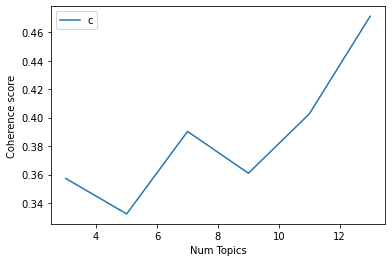

In [44]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [45]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 3  has Coherence Value of 0.3572
Num Topics = 5  has Coherence Value of 0.3323
Num Topics = 7  has Coherence Value of 0.3903
Num Topics = 9  has Coherence Value of 0.361
Num Topics = 11  has Coherence Value of 0.4026
Num Topics = 13  has Coherence Value of 0.4713


- Usaremos el modelo con 13 tópicos ya que hay un amuento significativo en el valor de coherencia en el modelo

In [46]:
# Select the model and print the topics
optimal_model = model_list[5]

In [47]:
archivo='./output/optimal_model_noticias_13'

In [48]:
optimal_model.save(archivo)

In [49]:
from gensim.models import LdaModel

optimal_model = LdaModel.load(archivo, mmap='r')

In [50]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, dataset, id2word)
vis

C:\Users\javie\miniconda3\envs\uach\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.285414 -0.024025       1        1  33.519933
7     -0.255708  0.117046       2        1  16.050856
3     -0.151960  0.039709       3        1  10.849722
10    -0.109097 -0.074392       4        1   9.935486
0      0.004224 -0.305860       5        1   7.641325
2      0.038397  0.029890       6        1   5.667051
9      0.043141  0.059281       7        1   5.437137
1      0.104105  0.025776       8        1   3.528433
5      0.118793  0.033299       9        1   2.999789
8      0.099159  0.035185      10        1   2.179550
11     0.134586  0.026643      11        1   1.979555
4      0.129630  0.019445      12        1   0.184418
12     0.130145  0.018003      13        1   0.026746, topic_info=                     Term        Freq       Total Category  logprob  loglift
4                   casos  381.000000  381.000000  Default  30.0000  30.0000
252              personas  688.000000  688.000000  Default  29.0000  29.0000
1482                dosis  201.000000  201.000000  Default  28.0000  28.0000
1412           vacunación  187.000000  187.000000  Default  27.0000  27.0000
578                  días  272.000000  272.000000  Default  26.0000  26.0000
...                   ...         ...         ...      ...      ...      ...
3370              tributo    0.001140    0.764099  Topic13  -9.6715   1.7189
1889  Sociedades Anónimas    0.001139    0.763587  Topic13  -9.6722   1.7188
4606         Jaime Bertin    0.001144    0.769963  Topic13  -9.6677   1.7150
3991               sesión    0.001144    0.773843  Topic13  -9.6677   1.7100
3359     edificio ubicado    0.001140    0.771053  Topic13  -9.6715   1.7098

[622 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1836      7  0.587818         $
1836     10  0.406951         $
5759      9  0.859373      2016
9219      9  0.952758      2017
638       1  0.912087      2020
...     ...       ...       ...
7718      3  0.979666  votación
7080      6  0.945050     votos
2340      5  0.991387   víctima
2846      1  0.986208  víctimas
3261      1  0.993928     zonas

[858 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 4, 11, 1, 3, 10, 2, 6, 9, 12, 5, 13])

Analizando las palabras que definen los tópicos de los temas podemos inferir que:
- El tópico 1 habla sobre proyectos realizados en una comuna, toma en cuenta la pandemias producida por el covid-19 y frecuentemente nombra figuras políticas, además se resalta la participación de mujeres en los proyectos (la palabra 'mujeres' aparece casi siempre en los documentos que tienen este tópico).

- El tópico 2 habla sobre la pandemia del covid-19 en su totalidad, considerando contagios, vacunación y la situación de los hospitales.

- El tópico 5 habla sobre ivestigaciones de delitos y su desenlace fiscal.

- El tópico 7 habla sobre deportes con algunas consecuencias debido a la reunión del público (incluye palabras como 'residuos' y 'alchohol').  

- Los tópicos del 8 al 13 están muy relacionados entre sí, aparentemente se centra en las restricciones impuestas debido a la pandemia de covid-19 respecto a las aglomeraciones de público en un deporte, sería entonces prudente analizar el modelo anterior que cuenta con un menor número de tópicos.

In [51]:
def format_topics_documents(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_documents(ldamodel=optimal_model, corpus=dataset, texts=noticias)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

C:\Users\javie\AppData\Local\Temp/ipykernel_12656/4135286971.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\javie\AppData\Local\Temp/ipykernel_12656/4135286971.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7.0,0.8536,"personas, casos, dosis, vacunación, comuna, cu...",La región de Los Lagos reportó este domingo 31...
1,1,9.0,0.9277,"puntos, juego, partido, final, viviendas, expe...",22 bibliotecas públicas de 10 regiones del pa...
2,2,2.0,0.5722,"agua, actividad, escenario, tema, personas, ca...",En conversación con Radio Sago el alcalde de ...
3,3,0.0,0.6043,"años, calle, investigación, hechos, imputado, ...",El Servicio Nacional de Pesca y Acuicultura d...
4,4,3.0,0.6181,"semana, medidas, horas, días, fin, situación, ...","Luego que el alcalde de Palena, Ricardo Soto,..."
5,5,11.0,0.4673,"hora, sueño, trazabilidad, síntomas, exámenes,...",Durante la tarde de ayer circuló en las redes...
6,6,7.0,0.3001,"personas, casos, dosis, vacunación, comuna, cu...",Dos ataques incendiarios se registraron en hor...
7,7,10.0,0.5936,"pacientes, años, grupo, meses, estudio, benefi...",Con el objetivo de verificar las obras de con...
8,8,7.0,0.7976,"personas, casos, dosis, vacunación, comuna, cu...",Un operativo sanitario enfocado al ganado rea...
9,9,4.0,0.4591,"resguardo, presente, banco, citaciones, reserv...",En un operativo en la Reserva Marina Pullinqu...


In [52]:
media_outlet = corpus.filter(['media_outlet'], axis=1)
df_dominant_topic=df_dominant_topic.join(media_outlet)

In [53]:
df_dominant_topic = df_dominant_topic[0:577]
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,0,7.0,0.8536,"personas, casos, dosis, vacunación, comuna, cu...",La región de Los Lagos reportó este domingo 31...,radiosago
1,1,9.0,0.9277,"puntos, juego, partido, final, viviendas, expe...",22 bibliotecas públicas de 10 regiones del pa...,radiosago
2,2,2.0,0.5722,"agua, actividad, escenario, tema, personas, ca...",En conversación con Radio Sago el alcalde de ...,radiosago
3,3,0.0,0.6043,"años, calle, investigación, hechos, imputado, ...",El Servicio Nacional de Pesca y Acuicultura d...,radiosago
4,4,3.0,0.6181,"semana, medidas, horas, días, fin, situación, ...","Luego que el alcalde de Palena, Ricardo Soto,...",radiosago
...,...,...,...,...,...,...
572,572,6.0,0.7692,"parte, año, trabajo, proyecto, tiempo, mujeres...",Autoridades regionales hicieron un llamado a p...,elheraldoaustral
573,573,6.0,0.5638,"parte, año, trabajo, proyecto, tiempo, mujeres...","Mercado, subastas y tendencia salarial de las ...",elheraldoaustral
574,574,6.0,0.5262,"parte, año, trabajo, proyecto, tiempo, mujeres...","Fundación SOL, presenta una nueva investigació...",elheraldoaustral
575,575,3.0,0.4009,"semana, medidas, horas, días, fin, situación, ...",G4 evalúa de manera independiente la política ...,elheraldoaustral


In [54]:
from pandasql import sqldf 

In [55]:
result = sqldf("SELECT Dominant_Topic, count(*) as nb_noticias FROM df_dominant_topic GROUP BY Dominant_Topic ORDER BY count(*) DESC")
result

,Dominant_Topic,nb_noticias
0,6.0,252
1,7.0,101
2,0.0,58
3,3.0,37
4,10.0,30
5,9.0,27
6,2.0,22
7,5.0,15
8,1.0,12
9,11.0,11


- Noticias más representativa de cada tópico

- Tópico 1

In [56]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=1.0 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,25,1.0,0.8468,"confinamiento, locales, control, metros, resultado, productos, medida, vehículos, recinto, sector","Fue inaugurada oficialmente el nuevo polo comercial ubicado en el sector de Avenida Los Robles, costado Ruta 5, que brindará un espacio a los comerciantes ambulantes de la ciudad, permitiendo además acercar productos de la zona a vecinos del sector de Bosquemar. Tras la inauguración de dicho recinto, el Alcalde Gervoy Paredes, manifestó que la feria está en plena consolidación y permitirá a los comerciantes ambulantes formalizar su actividad. La presidenta de los comerciantes ambulantes históricos, Patricia Cárcamo, extendió la invitación a los puertomontinos para que todos visiten dicha feria de abastecimiento. La feria ubicada en el sector de Avenida Los Robles, costado Ruta 5, cuenta con 81 locales comerciales, los que están distribuidos en 8 mil metros cuadrados y tiene una capacidad para recibir a más de mil personas, ofreciendo productos frescos de la zona. A medida que transcurran las semanas se irán integrando otros productos y servicios los que serán informados oportu...",radiosago


- Tópico 2

In [58]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=2.0 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,398,2.0,0.8074,"agua, actividad, escenario, tema, personas, campaña, disco, situación, canción, canciones","Chile complicó sus opciones de clasificar a la segunda ronda del preolímpico de balonmano luego de perder ayer por 38-23 ante el combinado de Noruega y hoy, frente al cuadro de Brasil, buscará un triunfo por más de cuatro goles de diferencia que lo mantenga con vida en el torneo. Desde el inicio la escuadra dirigida por Mateo Garralda fue superada por el juego de Noruega, que aprovechó la apuesta del entrenador español, de reservar a sus mejores jugadores para el duelo ante los brasileños, para sacar rápida ventaja en el marcador y cerrar el primer tiempo con una ventaja de nueve goles (19-10). De ese golpe nunca pudo recuperarse el representativo nacional, que pese a ser más efectivo en sus tiros al arco noruego en la segunda parte (anotaron 13 tantos por los 10 que convirtieron en el primer lapso), no pudieron controlar al inspirado extremo derecho Kevin Gulliksen, quien se inscribió con 10 anotaciones en la misma cantidad de tiros que ejecutó en el arco chileno. Sin los hermanos...",elaustral


- Aparentemente el orden de los tópicos ha cambiado, puesto que el tópico 2 usando la visualización de pyLDAvis corresponde a información sanitaria, mientras que ahora corresponde al tópico 6 de dicha visualización. 

- Tópico 5

In [59]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=5.0 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,88,5.0,0.938,"club, público, cinta, película, categoría, actor, entrenador, mujer, ministra, equipo","De la mano del entrañable personaje de Sergio Chamy, a estas alturas conocido masivamente como don Sergio, la realizadora nacional Maite Alberdi alcanzó ayer en la mañana la primera nominación de un documental chileno a los premios Oscar, luego de que la Academia anunciara que “El agente topo”, cinta que muestra cómo un octogenario aprendiz de detective se infiltra en un asilo para descubrir cualquier posible irregularidad en el lugar, competirá en la categoría a Mejor Documental en la ceremonia del próximo 25 de abril. Para la ministra de las Culturas, las Artes y el Patrimonio, Consuelo Valdés: ""Esta nominación significa mayores posibilidades de visibilización para los profesionales del área audiovisual y en particular para esta talentosa mujer creadora, quien desde la profundidad y naturalidad de su relato ha sido capaz de conmover al público que desde distintas latitudes apuesta por su triunfo y el del adorable don Sergio. Le deseamos mucho éxito a ella y a todo el equipo en es...",elheraldoaustral
